In [2]:
import numpy as np 
import pandas as pd
import os
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
flight_data=pd.read_csv("Flights.csv")
flight_data.head()

C:\Users\Minni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143,1025,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135,930,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132,930,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136,930,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151,1005,0.62


In [4]:
rows,cols = flight_data.shape
print("Number of rows in table: ", rows)
print("Number of columns in table: ", cols)

Number of rows in table:  1915886
Number of columns in table:  16


In [22]:
# flight_data.info
flt_data_1= flight_data.dropna()
flt_data_1.head()



,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143,1025,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135,930,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132,930,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136,930,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151,1005,0.62


In [6]:
rows,cols = flt_data_1.shape
print("Number of rows in table: ", rows)
print("Number of columns in table: ", cols)

Number of rows in table:  1858595
Number of columns in table:  16


In [7]:
total_carrier = flight_data['OP_CARRIER'].value_counts()
total_carrier

WN    330295
AA    232973
DL    225391
OO    195141
UA    144328
YX     77168
MQ     75780
B6     72788
OH     68825
AS     61476
9E     60905
YV     53699
NK     46060
EV     37276
QX     28634
F9     28242
PT     27731
ZW     25987
CP     24330
G4     24294
G7     21221
HA     19689
AX     18661
C5     12383
EM      2161
KS       448
Name: OP_CARRIER, dtype: int64

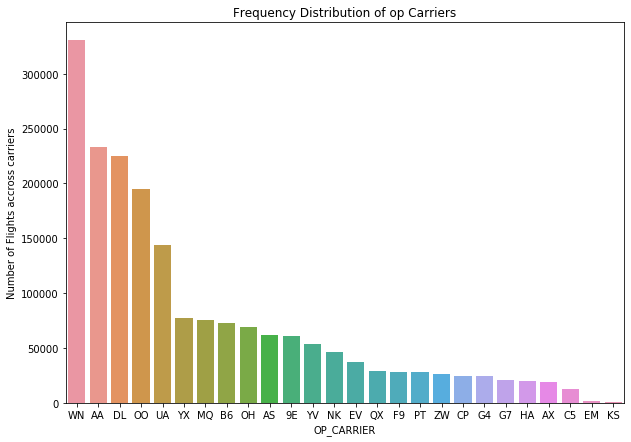

In [9]:
f,ax=plt.subplots(1,1,figsize=(10,7))
sns.countplot('OP_CARRIER',order = flight_data['OP_CARRIER'].value_counts().index, data=flight_data,ax=ax)
ax.set_title('Frequency Distribution of op Carriers')
ax.set_ylabel('Number of Flights accross carriers')
plt.show()

In [8]:
dest_flight_num = flight_data.groupby('ORIGIN')['DESTINATION'].value_counts()

dest_flight_num.head(10)

ORIGIN  DESTINATION
ABE     CLT            258
        DTW            253
        ATL            217
        PHL            179
        ORD            175
        SFB            124
        PIE             44
        PGD             40
        FLL             20
ABI     DFW            490
Name: DESTINATION, dtype: int64

In [9]:
# 1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
# Exclude canceled flights when performing the calculation.
busiest_origin = flight_data.loc[flight_data['CANCELLED']==0.00].groupby(['ORIGIN'])['DESTINATION'].count()
busiest_origin.sort_values(ascending=False).head(10)

ORIGIN
ATL    92994
ORD    86650
DFW    68646
DEN    62446
CLT    60690
LAX    59152
PHX    44719
IAH    43526
SEA    42619
DTW    40523
Name: DESTINATION, dtype: int64

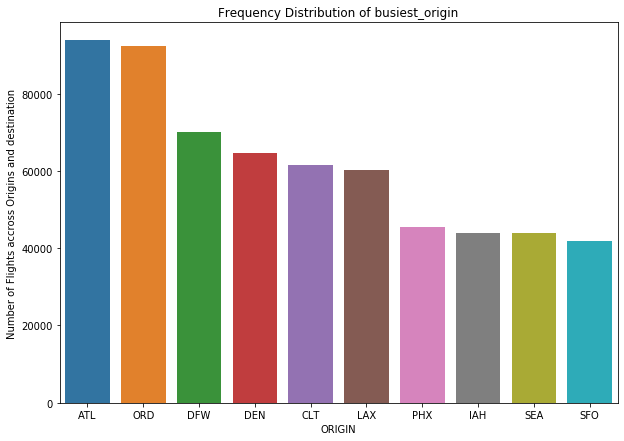

In [10]:
# Graphical representation of the busiest origin according to the 
f,ax=plt.subplots(1,1,figsize=(10,7))
sns.countplot('ORIGIN',order = flight_data['ORIGIN'].value_counts().head(10).index, data=flight_data,ax=ax)
ax.set_title('Frequency Distribution of busiest_origin')
ax.set_ylabel('Number of Flights accross Origins and destination')
plt.show()

In [11]:
# 2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
# the quarter. Along with the profit, show total revenue, total cost, summary values of
# other key components and total round trip flights in the quarter for the top 10 most
# profitable routes. Exclude canceled flights from these calculations

tickets_data=pd.read_csv("Tickets.csv")
tickets_data.head(5)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


In [12]:
# Dropping the NA and NAN values, which affects the sorting based on fare
tickets_data.dropna()
tickets_data.head(5)
tickets_data.loc[tickets_data['ROUNDTRIP']==1.00].sort_values(by='ITIN_FARE',ascending=False).head(10)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
289022,201911768384,2019,1,DEN,US,CO,Colorado,1.0,DL,1.0,999.0,HNL
990042,201914951803,2019,1,STL,US,MO,Missouri,1.0,WN,4.0,999.0,RSW
416917,201913776053,2019,1,HNL,US,HI,Hawaii,1.0,UA,1.0,999.0,TPA
441333,201915171433,2019,1,IAH,US,TX,Texas,1.0,YX,1.0,999.0,LGA
485086,201911399836,2019,1,JFK,US,NY,New York,1.0,B6,1.0,999.0,SFO
1038662,201911557286,2019,1,ATL,US,GA,Georgia,1.0,DL,1.0,999.0,CLT
178585,201913568031,2019,1,BWI,US,MD,Maryland,1.0,UA,1.0,999.0,SFO
959493,201912379625,2019,1,SLC,US,UT,Utah,1.0,DL,1.0,999.0,OGG
788145,20191877067,2019,1,PHX,US,AZ,Arizona,1.0,AA,1.0,999.0,LEX
769501,20191845800,2019,1,PHL,US,PA,Pennsylvania,1.0,AA,1.0,999.0,PHX


In [20]:
# 3.The 5 round trip routes that you recommend to invest in based on any factors that you choose.

tickets_data[(tickets_data['ROUNDTRIP']==1.00) & (tickets_data['PASSENGERS']>1.00)].sort_values(by=['ITIN_FARE','PASSENGERS'],ascending=False).head(5)


,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
323006,201911795743,2019,1,DTW,US,MI,Michigan,1.0,DL,4.0,999.0,LAS
328915,201911817838,2019,1,DTW,US,MI,Michigan,1.0,DL,4.0,999.0,TPA
435506,201913809660,2019,1,IAD,US,VA,Virginia,1.0,UA,4.0,999.0,SFO
990042,201914951803,2019,1,STL,US,MO,Missouri,1.0,WN,4.0,999.0,RSW
216306,201913010769,2019,1,CLT,US,NC,North Carolina,1.0,OH,3.0,999.0,STL


In [42]:
# 4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
# each of the 5 round trip routes that you recommend. Print key summary components for
# these routes.

# tickets_data[(tickets_data['ROUNDTRIP']==1.00) & (tickets_data['PASSENGERS']>1.00)].sort_values(by=['ITIN_FARE','PASSENGERS'],ascending=False).head(5)
flight_data['COST_OF_TRIPS']=((flight_data['DISTANCE'].apply(lambda x: x if str(x).isdigit() else 0).astype(float))*9.18)+20000+ (flight_data['DEP_DELAY']-15).apply(lambda x: x if x>0 else 0)*75+(flight_data['ARR_DELAY']-15).apply(lambda x: x if x>0 else 0)*75
flight_data.head(5)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,COST_OF_TRIPS
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143,1025,0.97,20000.0
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135,930,0.55,20000.0
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132,930,0.91,20000.0
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136,930,0.67,20000.0
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151,1005,0.62,20000.0


In [ ]:
# 5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
# measure the success of the round trip routes that you recommend.

1. If Arrival and Departure delays are reduced, the cost saving can be done.
2. Shorter routes will reduce the cost of fuel as well as insurance.
3. Revenue will be more if occupancy rates are increased (with reduced fare and offers like enhanced baggeage allowance, priority seat selection).
4. Usage of multiple boarding and deboarding gates to reduce the wait time and delays.
5. Baggage loading and unloading can be planned way ahhead to reduce delays for round trips.